In [1]:
import requests#allow you to send HTTP requests and retrieve a response object containing your response data
import json#load your response data in a structured way to parse through it
from pprint import pprint#more readable way

token = "c5mom32ad3iam7tunqg0"
symbol = "AAPL" 

In [2]:
base_url = "https://finnhub.io/api/v1/stock/profile2?"
r = requests.get(base_url, params = {'symbol':symbol,'token':token})
t = r.text
company_profile = json.loads(t)

pprint(company_profile)


{'country': 'US',
 'currency': 'USD',
 'exchange': 'NASDAQ NMS - GLOBAL MARKET',
 'finnhubIndustry': 'Technology',
 'ipo': '1980-12-12',
 'logo': 'https://finnhub.io/api/logo?symbol=AAPL',
 'marketCapitalization': 2485405,
 'name': 'Apple Inc',
 'phone': '14089961010.0',
 'shareOutstanding': 16426.79,
 'ticker': 'AAPL',
 'weburl': 'https://www.apple.com/'}


In [4]:
base_url = 'https://finnhub.io/api/v1/company-news?'
r = requests.get(base_url, params = {'symbol': symbol,'token':token, 'from':'2021-8-18', 'to':'2021-10-18'})
text = r.text
company_news = json.loads(text)

pprint(len(company_news))#每天十筆
for i in range(0,len(company_news)):
    pprint(company_news[i]['summary'])


500
('Asian shares advanced on Tuesday, supported by a tech-driven Wall Street '
 'rally, and a rebound in Chinese markets a day after weak data heightened '
 "investor concerns about the world's second-largest economy.")
('We closed the first trading day of the week mixed, after starting the day in '
 'the red across the board.')
''
('Apple Inc on Monday announced two new MacBook Pro models that run on more '
 'powerful in-house chips, furthering its break from previous supplier Intel '
 'Corp and showing its strategy for setting its machines apart from the rest '
 'of the PC industry.')
('Apple (AAPL) closed the most recent trading day at $146.55, moving +1.18% '
 'from the previous trading session.')
("Mr. Wonderful is calling for a Bitcoin boom. But he hasn't forgotten about "
 'dividends.')
('The S&P and Nasdaq closed higher on Monday with the biggest boosts from the '
 'highest-profile technology and communications companies while investors eyed '
 'product news from Apple Inc an

In [5]:
import flair
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2021-10-19 14:57:50,561 loading file /Users/huangyushu/.flair/models/sentiment-en-mix-distillbert_4.pt


In [33]:
import pandas as pd
from pandas import DataFrame
df = DataFrame(company_news)
if(df['summary'][2]==''):
    print('none')
# df = df.drop([2])
for i in range(0,500):
    if (df['summary'][i]==''):
        df=df.drop([i])
#         df = df.dropna(axis=0, how='any', inplace=True)
df

,category,datetime,headline,id,image,related,source,summary,url
1,company,1634594268,Apple doubles down on chip strategy with new p...,71456991,https://static.reuters.com/resources/r/?m=02&d...,AAPL,Reuters,Apple Inc on Monday announced two new MacBook ...,https://finnhub.io/api/news?id=bb9fbdff5b84d56...
2,company,1634588094,"Apple launches faster chips, MacBook Pro lapto...",71458089,https://static.reuters.com/resources/r/?m=02&d...,AAPL,Reuters,Apple Inc on Monday released two new chips bui...,https://finnhub.io/api/news?id=43c480440a2b92b...
3,company,1634579013,U.S. bill would stop Big Tech favoring its own...,71451692,,AAPL,Finnhub,About a dozen U.S. senators from both parties ...,https://finnhub.io/api/news?id=be98d2e93bba7e0...
4,company,1634578865,Apple : New MacBook Pro features ultra-fast ch...,71451676,,AAPL,Finnhub,"San Francisco, Oct 18 .- Apple on Monday unvei...",https://finnhub.io/api/news?id=7b17fd1737b1950...
5,company,1634578448,APPLE INC : JP Morgan reiterates its Buy rating,71451661,,AAPL,Finnhub,"In a research note, JP Morgan analyst Samik Ch...",https://finnhub.io/api/news?id=3026788a0b03949...
...,...,...,...,...,...,...,...,...,...
495,company,1633716240,With U.S. Credit Default No Longer a Likely Th...,71230478,https://cdn.benzinga.com/files/imagecache/og_i...,AAPL,Benzinga,Photo by Joshua Woroniecki on Unsplash\nAfter ...,https://finnhub.io/api/news?id=cbdd87667817fe2...
496,company,1633715340,ANALYSIS-Tesla speeds the EV industry's South ...,71234074,https://www.nasdaq.com/sites/acquia.prod/files...,AAPL,Nasdaq,Tesla Inc's decision to move its headquarters ...,https://finnhub.io/api/news?id=d7a25ff261bcbe6...
497,company,1633713660,"Big Tech, Saudi Oil, and the Pursuit of $100 B...",71222930,https://s.yimg.com/ny/api/res/1.2/NqoytViGyC5S...,AAPL,Yahoo,Even as inflation and shortages cast doubt ove...,https://finnhub.io/api/news?id=94bfd28e333fb84...
498,company,1633712443,Apple Stock Remains a ‘Buy’ Despite Supply Cha...,71222931,https://s.yimg.com/uu/api/res/1.2/M8bnew6keX8n...,AAPL,Yahoo,The iPhone’s major selling season is here but ...,https://finnhub.io/api/news?id=65ac9c2dbcd5c9b...


In [36]:
import re
# tweet = '@switchfoot http://twitpic.com/2y1zl - Awww   yeah Tesla'
probs = []
sentiments = []
# select = []

whitespace = re.compile(r"\s+")
web_address = re.compile('http:\/\/[a-z0-9.~_\-\/]+')
# tesla = re.compile('Tesla')
user = re.compile(r"(?i)@[a-z0-9_]+")

tweets = df
# tweets = df['text']
for tweet in tweets['summary'].to_list():
    # we then use the sub method to replace anything matching
        tweet = whitespace.sub(' ', tweet)
            # print(tweet)
        tweet = web_address.sub('', tweet)
            # print(tweet)
           #  tweet = tesla.search('Tesla',tweet)
        tweet = user.sub('', tweet)
#         result = re.search('Tesla', tweet)
#         select.append(result)
   # make prediction
        sentence = flair.data.Sentence(tweet)
        sentiment_model.predict(sentence)
#         if(sentence):
#             print(sentence.labels[0])
#     extract sentiment prediction
#         if(sentence):
        if(sentence.labels[0].value=='NEGATIVE'):
            probs.append(0-sentence.labels[0].score)  # numerical score 0-1
        else:
            probs.append(sentence.labels[0].score)  # numerical score 0-1
        sentiments.append(sentence.labels[0].value)  # 'POSITIVE' or 'NEGATIVE'
#         print(tweet)
tweets['probability'] = probs
tweets['sentiment'] = sentiments

    

# tweets['useful'] = select
tweets

,category,datetime,headline,id,image,related,source,summary,url,probability,sentiment,abso_time,avgpro
1,company,1634579013,U.S. bill would stop Big Tech favoring its own...,71451692,,AAPL,Finnhub,About a dozen U.S. senators from both parties ...,https://finnhub.io/api/news?id=be98d2e93bba7e0...,-0.987555,NEGATIVE,2021-10-18 17:43:33,0.400204
2,company,1634578865,Apple : New MacBook Pro features ultra-fast ch...,71451676,,AAPL,Finnhub,"San Francisco, Oct 18 .- Apple on Monday unvei...",https://finnhub.io/api/news?id=7b17fd1737b1950...,-0.848382,NEGATIVE,2021-10-18 17:41:05,0.400204
3,company,1634578448,APPLE INC : JP Morgan reiterates its Buy rating,71451661,,AAPL,Finnhub,"In a research note, JP Morgan analyst Samik Ch...",https://finnhub.io/api/news?id=3026788a0b03949...,0.650666,POSITIVE,2021-10-18 17:34:08,0.400204
4,company,1634577256,Apple : unveils upgrades for MacBook Pro lapto...,71451465,,AAPL,Finnhub,Apple has announced the revamping of its MacBo...,https://finnhub.io/api/news?id=afc71621a484a4c...,0.838152,POSITIVE,2021-10-18 17:14:16,0.400204
5,company,1634571951,"Apple : launches faster chips, MacBook Pro lap...",71449584,,AAPL,Finnhub,Apple Inc on Monday released twonew chips buil...,https://finnhub.io/api/news?id=1d9486965d41467...,-0.615820,NEGATIVE,2021-10-18 15:45:51,0.400204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,company,1633712443,Apple Stock Remains a ‘Buy’ Despite Supply Cha...,71222931,https://s.yimg.com/uu/api/res/1.2/M8bnew6keX8n...,AAPL,Yahoo,The iPhone’s major selling season is here but ...,https://finnhub.io/api/news?id=65ac9c2dbcd5c9b...,-0.942519,NEGATIVE,2021-10-08 17:00:43,0.108994
496,company,1633709460,Apple Plans New Headquarters Complex In Culver...,71230433,https://cdn.benzinga.com/files/imagecache/og_i...,AAPL,Benzinga,Elon Musk might be moving Tesla Inc.'s (NASDAQ...,https://finnhub.io/api/news?id=62b64381fa36904...,0.644109,POSITIVE,2021-10-08 16:11:00,0.108994
497,company,1633708620,The Thing Behind The Thing: ASML Powering The ...,71225915,https://cdn.benzinga.com/files/imagecache/og_i...,AAPL,Benzinga,Benzinga routinely examines a stock that might...,https://finnhub.io/api/news?id=96629bfdb256384...,0.843834,POSITIVE,2021-10-08 15:57:00,0.108994
498,company,1633708080,China Stocks: A Clearance Sale Or A Sale To St...,71224773,https://cdn.benzinga.com/files/imagecache/og_i...,AAPL,Benzinga,"Chinese stocks, listed both in Asia--particula...",https://finnhub.io/api/news?id=39574be7e65a188...,-0.999947,NEGATIVE,2021-10-08 15:48:00,0.108994


In [37]:
from datetime import datetime
newtime=[]
df = tweets
for data in df['datetime'].to_list():
#     ts = data
    data = datetime.utcfromtimestamp(data).strftime('%Y-%m-%d %H:%M:%S')
    newtime.append(data)
# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
#     print(datetime.utcfromtimestamp(data).strftime('%Y-%m-%d %H:%M:%S'))
    
df['abso_time'] = newtime
df


,category,datetime,headline,id,image,related,source,summary,url,probability,sentiment,abso_time,avgpro
1,company,1634579013,U.S. bill would stop Big Tech favoring its own...,71451692,,AAPL,Finnhub,About a dozen U.S. senators from both parties ...,https://finnhub.io/api/news?id=be98d2e93bba7e0...,-0.987555,NEGATIVE,2021-10-18 17:43:33,0.400204
2,company,1634578865,Apple : New MacBook Pro features ultra-fast ch...,71451676,,AAPL,Finnhub,"San Francisco, Oct 18 .- Apple on Monday unvei...",https://finnhub.io/api/news?id=7b17fd1737b1950...,-0.848382,NEGATIVE,2021-10-18 17:41:05,0.400204
3,company,1634578448,APPLE INC : JP Morgan reiterates its Buy rating,71451661,,AAPL,Finnhub,"In a research note, JP Morgan analyst Samik Ch...",https://finnhub.io/api/news?id=3026788a0b03949...,0.650666,POSITIVE,2021-10-18 17:34:08,0.400204
4,company,1634577256,Apple : unveils upgrades for MacBook Pro lapto...,71451465,,AAPL,Finnhub,Apple has announced the revamping of its MacBo...,https://finnhub.io/api/news?id=afc71621a484a4c...,0.838152,POSITIVE,2021-10-18 17:14:16,0.400204
5,company,1634571951,"Apple : launches faster chips, MacBook Pro lap...",71449584,,AAPL,Finnhub,Apple Inc on Monday released twonew chips buil...,https://finnhub.io/api/news?id=1d9486965d41467...,-0.615820,NEGATIVE,2021-10-18 15:45:51,0.400204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,company,1633712443,Apple Stock Remains a ‘Buy’ Despite Supply Cha...,71222931,https://s.yimg.com/uu/api/res/1.2/M8bnew6keX8n...,AAPL,Yahoo,The iPhone’s major selling season is here but ...,https://finnhub.io/api/news?id=65ac9c2dbcd5c9b...,-0.942519,NEGATIVE,2021-10-08 17:00:43,0.108994
496,company,1633709460,Apple Plans New Headquarters Complex In Culver...,71230433,https://cdn.benzinga.com/files/imagecache/og_i...,AAPL,Benzinga,Elon Musk might be moving Tesla Inc.'s (NASDAQ...,https://finnhub.io/api/news?id=62b64381fa36904...,0.644109,POSITIVE,2021-10-08 16:11:00,0.108994
497,company,1633708620,The Thing Behind The Thing: ASML Powering The ...,71225915,https://cdn.benzinga.com/files/imagecache/og_i...,AAPL,Benzinga,Benzinga routinely examines a stock that might...,https://finnhub.io/api/news?id=96629bfdb256384...,0.843834,POSITIVE,2021-10-08 15:57:00,0.108994
498,company,1633708080,China Stocks: A Clearance Sale Or A Sale To St...,71224773,https://cdn.benzinga.com/files/imagecache/og_i...,AAPL,Benzinga,"Chinese stocks, listed both in Asia--particula...",https://finnhub.io/api/news?id=39574be7e65a188...,-0.999947,NEGATIVE,2021-10-08 15:48:00,0.108994


In [50]:
import statistics
print (df['probability'][0:10])
list = []
m = []
newm = []
rest = []
fin = []
print(len(df.index) )
for i in range(int(len(df.index)/65)):
    for j in df['probability'][65*i:(65*i)+65]:
        list.append(j)
    mean = statistics.mean(list)
    
    print(i)
    m.append(mean)
    print(mean)
print(m)
for n in m:
    for i in range(65):
        newm.append(n)
print(len(newm))
# for j in df['probability'][len(newm):]:
#         print(j)
#         rest.append(j)
# rmean = statistics.mean(rest)
# for i in range(len(rest)):
#     newm.append(rmean)
# m.append(rmean)
print(newm)
print(m)
# fin = newm+rest
# fin
print(len(newm))
print(len(m))

1    -0.987555
2    -0.848382
3     0.650666
4     0.838152
5    -0.615820
6     0.993072
7     0.999632
8     0.973139
9     0.999645
10    0.999491
Name: probability, dtype: float64
455
0
0.048055601119995114
1
-0.11148571922228886
2
-0.13182590313446826
3
-0.1454795504991825
4
-0.17606987751447237
5
-0.1661303821282509
6
-0.18576258250645228
[0.048055601119995114, -0.11148571922228886, -0.13182590313446826, -0.1454795504991825, -0.17606987751447237, -0.1661303821282509, -0.18576258250645228]
455
[0.048055601119995114, 0.048055601119995114, 0.048055601119995114, 0.048055601119995114, 0.048055601119995114, 0.048055601119995114, 0.048055601119995114, 0.048055601119995114, 0.048055601119995114, 0.048055601119995114, 0.048055601119995114, 0.048055601119995114, 0.048055601119995114, 0.048055601119995114, 0.048055601119995114, 0.048055601119995114, 0.048055601119995114, 0.048055601119995114, 0.048055601119995114, 0.048055601119995114, 0.048055601119995114, 0.048055601119995114, 0.048055601

In [46]:
df['avgpro'] = newm
df

,category,datetime,headline,id,image,related,source,summary,url,probability,sentiment,abso_time,avgpro
1,company,1634579013,U.S. bill would stop Big Tech favoring its own...,71451692,,AAPL,Finnhub,About a dozen U.S. senators from both parties ...,https://finnhub.io/api/news?id=be98d2e93bba7e0...,-0.987555,NEGATIVE,2021-10-18 17:43:33,0.048056
2,company,1634578865,Apple : New MacBook Pro features ultra-fast ch...,71451676,,AAPL,Finnhub,"San Francisco, Oct 18 .- Apple on Monday unvei...",https://finnhub.io/api/news?id=7b17fd1737b1950...,-0.848382,NEGATIVE,2021-10-18 17:41:05,0.048056
3,company,1634578448,APPLE INC : JP Morgan reiterates its Buy rating,71451661,,AAPL,Finnhub,"In a research note, JP Morgan analyst Samik Ch...",https://finnhub.io/api/news?id=3026788a0b03949...,0.650666,POSITIVE,2021-10-18 17:34:08,0.048056
4,company,1634577256,Apple : unveils upgrades for MacBook Pro lapto...,71451465,,AAPL,Finnhub,Apple has announced the revamping of its MacBo...,https://finnhub.io/api/news?id=afc71621a484a4c...,0.838152,POSITIVE,2021-10-18 17:14:16,0.048056
5,company,1634571951,"Apple : launches faster chips, MacBook Pro lap...",71449584,,AAPL,Finnhub,Apple Inc on Monday released twonew chips buil...,https://finnhub.io/api/news?id=1d9486965d41467...,-0.615820,NEGATIVE,2021-10-18 15:45:51,0.048056
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,company,1633712443,Apple Stock Remains a ‘Buy’ Despite Supply Cha...,71222931,https://s.yimg.com/uu/api/res/1.2/M8bnew6keX8n...,AAPL,Yahoo,The iPhone’s major selling season is here but ...,https://finnhub.io/api/news?id=65ac9c2dbcd5c9b...,-0.942519,NEGATIVE,2021-10-08 17:00:43,-0.185763
496,company,1633709460,Apple Plans New Headquarters Complex In Culver...,71230433,https://cdn.benzinga.com/files/imagecache/og_i...,AAPL,Benzinga,Elon Musk might be moving Tesla Inc.'s (NASDAQ...,https://finnhub.io/api/news?id=62b64381fa36904...,0.644109,POSITIVE,2021-10-08 16:11:00,-0.185763
497,company,1633708620,The Thing Behind The Thing: ASML Powering The ...,71225915,https://cdn.benzinga.com/files/imagecache/og_i...,AAPL,Benzinga,Benzinga routinely examines a stock that might...,https://finnhub.io/api/news?id=96629bfdb256384...,0.843834,POSITIVE,2021-10-08 15:57:00,-0.185763
498,company,1633708080,China Stocks: A Clearance Sale Or A Sale To St...,71224773,https://cdn.benzinga.com/files/imagecache/og_i...,AAPL,Benzinga,"Chinese stocks, listed both in Asia--particula...",https://finnhub.io/api/news?id=39574be7e65a188...,-0.999947,NEGATIVE,2021-10-08 15:48:00,-0.185763


In [11]:
base_url = "https://finnhub.io/api/v1/stock/candle?"
r = requests.get(base_url, params = {'symbol': symbol,'resolution':'1','token':token, 'from':'1633706281', 'to':'1634579013'})
text = r.text
candles = json.loads(text)

# pprint(candles)

price = DataFrame(candles)
price

# import finnhub
# finnhub_client = finnhub.Client(api_key=token)
# print(finnhub_client.stock_candles('AAPL', 'D', 1634579013, 1633706281))

,c,h,l,o,s,t,v
0,143.430,143.49,143.430,143.470,ok,1633706340,80930
1,143.350,143.45,143.349,143.440,ok,1633706400,173455
2,143.390,143.43,143.340,143.350,ok,1633706460,79013
3,143.320,143.41,143.320,143.400,ok,1633706520,69955
4,143.330,143.37,143.320,143.330,ok,1633706580,79074
...,...,...,...,...,...,...,...
4749,145.925,145.96,145.925,145.945,ok,1634578740,83290
4750,145.810,145.94,145.790,145.930,ok,1634578800,263623
4751,145.850,145.86,145.790,145.800,ok,1634578860,159965
4752,145.790,145.85,145.775,145.850,ok,1634578920,108009


In [12]:
from datetime import datetime
newtime=[]
df = tweets
for data in price['t'].to_list():
#     ts = data
    data = datetime.utcfromtimestamp(data).strftime('%Y-%m-%d %H:%M:%S')
    newtime.append(data)
# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
#     print(datetime.utcfromtimestamp(data).strftime('%Y-%m-%d %H:%M:%S'))
    
price['abso_time'] = newtime
price

,c,h,l,o,s,t,v,abso_time
0,143.430,143.49,143.430,143.470,ok,1633706340,80930,2021-10-08 15:19:00
1,143.350,143.45,143.349,143.440,ok,1633706400,173455,2021-10-08 15:20:00
2,143.390,143.43,143.340,143.350,ok,1633706460,79013,2021-10-08 15:21:00
3,143.320,143.41,143.320,143.400,ok,1633706520,69955,2021-10-08 15:22:00
4,143.330,143.37,143.320,143.330,ok,1633706580,79074,2021-10-08 15:23:00
...,...,...,...,...,...,...,...,...
4749,145.925,145.96,145.925,145.945,ok,1634578740,83290,2021-10-18 17:39:00
4750,145.810,145.94,145.790,145.930,ok,1634578800,263623,2021-10-18 17:40:00
4751,145.850,145.86,145.790,145.800,ok,1634578860,159965,2021-10-18 17:41:00
4752,145.790,145.85,145.775,145.850,ok,1634578920,108009,2021-10-18 17:42:00


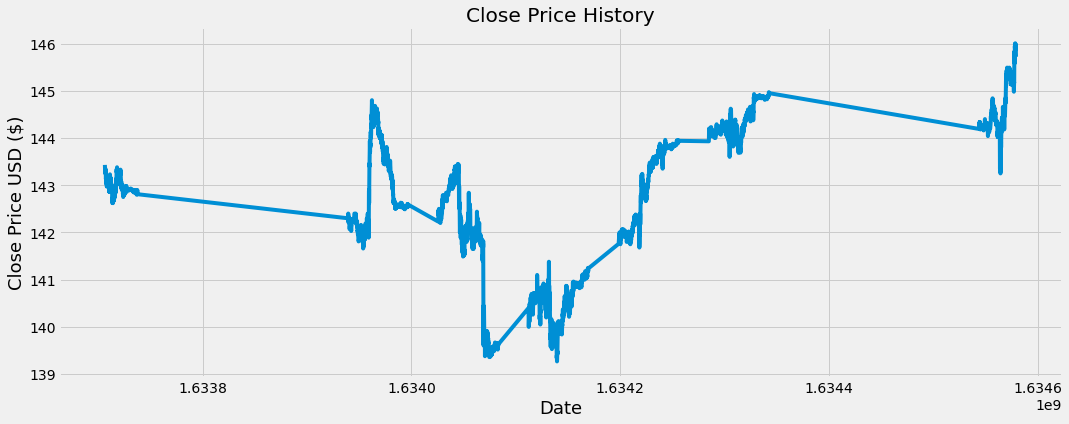

In [221]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(price['t'],price['c'])
# plt.plot(df['datetime'],df['probability'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

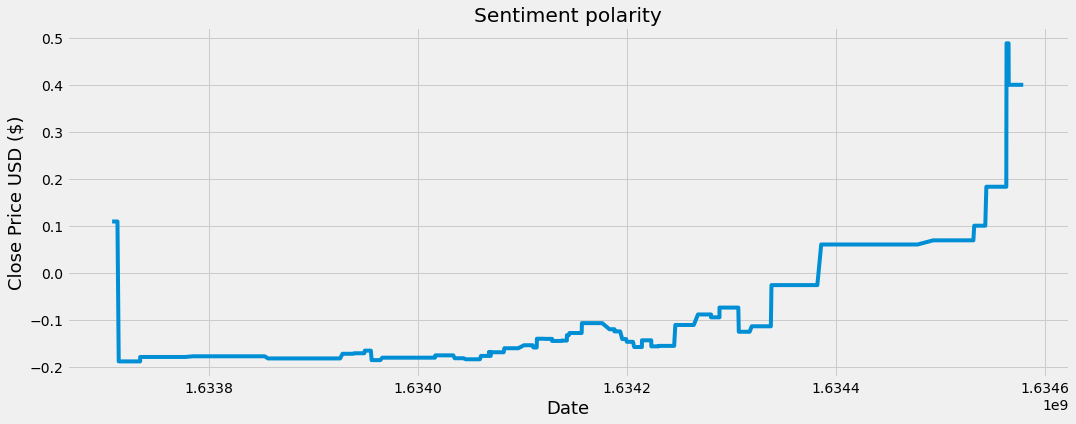

In [13]:
plt.figure(figsize=(16,6))
plt.title('Sentiment polarity')
# plt.plot(price['t'],price['c'])
plt.plot(df['datetime'],df['avgpro'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [24]:
import numpy as np

import matplotlib.pyplot as plt
# import seaborn as sns

# sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
from pandas_datareader.data import DataReader
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2021-10-09', end='2021-10-18')
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-08,144.179993,142.559998,144.029999,142.899994,58718700,142.899994
2021-10-11,144.809998,141.809998,142.270004,142.809998,64452200,142.809998
2021-10-12,143.250000,141.039993,143.229996,141.509995,73035900,141.509995
2021-10-13,141.399994,139.199997,141.240005,140.910004,78762700,140.910004
2021-10-14,143.880005,141.509995,142.110001,143.759995,69907100,143.759995
2021-10-15,144.899994,143.509995,143.770004,144.839996,67885200,144.839996
2021-10-18,146.839996,143.160004,143.449997,146.550003,85268800,146.550003


In [51]:
regular = []
for item in m:
    item = item+1
    regular.append(item)
m.reverse()

In [52]:
print(m)
print(regular)

[-0.18576258250645228, -0.1661303821282509, -0.17606987751447237, -0.1454795504991825, -0.13182590313446826, -0.11148571922228886, 0.048055601119995114]
[1.048055601119995, 0.8885142807777111, 0.8681740968655317, 0.8545204495008175, 0.8239301224855277, 0.8338696178717491, 0.8142374174935477]
